In [211]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.size": 20
# })

In [212]:
df = None

alias = {
    "visual_ppo_eval_agent_50": "VanillaPPO_50_QuantileAgent_Visual",
    "visual_ppo_eval_agent_25": "VanillaPPO_25_QuantileAgent_Visual",
    "visual_ppo_eval_fallback_25_agent_50_0.9": "VanillaPPO_Visual_50_Agent+CALF_25_Fallback_0.9",
    "visual_ppo_eval_fallback_25_agent_50_0.5": "VanillaPPO_Visual_50_Agent+CALF_25_Fallback_0.5",
    "visual_ppo_eval_fallback_25_agent_50_0.25": "VanillaPPO_Visual_50_Agent+CALF_25_Fallback_0.25",
    # "visual_ppo_eval_fallback_25_agent_25": "VanillaPPO_Visual_25_Agent+CALFWrapper_25_Fallback",
    # "visual_ppo_eval_fallback_50_agent_50": "VanillaPPO_Visual_50_Agent+CALFWrapper_50_Fallback",
}

for root, dirs, files in os.walk("../logs"):
    for fn in files:
        
        if not fn.endswith(".csv") or "seed" not in fn:
            continue
        file_path = os.path.join(root, fn)

        tmp_df = pd.read_csv(file_path, sep=',')
        
        # Convert string to array
        for k in tmp_df:            
            tmp_df[k] = tmp_df[k].apply(lambda x: x if not isinstance(x, str) else np.fromstring(
                                        x.replace('\n','')
                                        .replace('[','')
                                        .replace(']','')
                                        .replace('  ',' '), sep=' '))
            
        tmp_df["action"] = tmp_df["action"].apply(lambda x: x[0])
        tmp_df["reward"] = tmp_df["reward"].apply(lambda x: x[0] if not isinstance(x, float) else x)
        tmp_df["accumulated_reward"] = tmp_df["accumulated_reward"].apply(lambda x: x[0] if not isinstance(x, float) else x)
        # if "relax_probability" in tmp_df.columns:
        #     tmp_df["relax_probability"] = tmp_df["relax_probability"].apply(lambda x: x[0] if x else x)
        
        tmp_df["x"] = tmp_df["state"].apply(lambda x: x[0])
        tmp_df["y"] = tmp_df["state"].apply(lambda x: x[1])
        tmp_df["angular_vel"] = tmp_df["state"].apply(lambda x: x[2])

        tmp_df["file_name"] = fn
        for k in alias:
            if k in fn:
                tmp_df["Case"] = alias[k]
                break

        if "Case" not in tmp_df:
            continue
        
        if df is None:
            df = tmp_df
        else:
            df = pd.concat([df, tmp_df])

/tmp/ipykernel_390438/1389533042.py:24: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  tmp_df[k] = tmp_df[k].apply(lambda x: x if not isinstance(x, str) else np.fromstring(
/tmp/ipykernel_390438/1389533042.py:24: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  tmp_df[k] = tmp_df[k].apply(lambda x: x if not isinstance(x, str) else np.fromstring(
/tmp/ipykernel_390438/1389533042.py:24: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  tmp_df[k] = tmp_df[k].apply(lambda x: x if not isinstance(x, str) else np.fromstring(
/tmp/ipykernel_390438/1389533042.py:24: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  tmp_df[k] = tmp_df[k].apply(lambda x: x if not isi

In [213]:
df.columns = ["step"] + df.columns[1:].tolist()
df.head()

,step,state,action,reward,accumulated_reward,x,y,angular_vel,file_name,Case,relax_probability,calf_activated_count
0,0,"[0.0, 0.0, 0.0]",2.0,-3.128346,-3.128346,0.0,0.0,0.0,visual_ppo_eval_agent_50_seed_21.csv,VanillaPPO_50_QuantileAgent_Visual,NaN,NaN
1,1,"[0.0, 0.0, 0.0]",2.0,-3.503687,-6.632033,0.0,0.0,0.0,visual_ppo_eval_agent_50_seed_21.csv,VanillaPPO_50_QuantileAgent_Visual,NaN,NaN
2,2,"[255.0, 255.0, 255.0]",2.0,-4.293057,-10.925091,255.0,255.0,255.0,visual_ppo_eval_agent_50_seed_21.csv,VanillaPPO_50_QuantileAgent_Visual,NaN,NaN
3,3,"[255.0, 255.0, 255.0]",2.0,-5.508985,-16.434076,255.0,255.0,255.0,visual_ppo_eval_agent_50_seed_21.csv,VanillaPPO_50_QuantileAgent_Visual,NaN,NaN
4,4,"[255.0, 255.0, 255.0]",2.0,-7.149148,-23.583225,255.0,255.0,255.0,visual_ppo_eval_agent_50_seed_21.csv,VanillaPPO_50_QuantileAgent_Visual,NaN,NaN


In [214]:
df[df.step == 0].loc[:, ["Case", "relax_probability"]].relax_probability.unique().round(2)

array([ nan, 0.5 , 0.9 , 0.25])

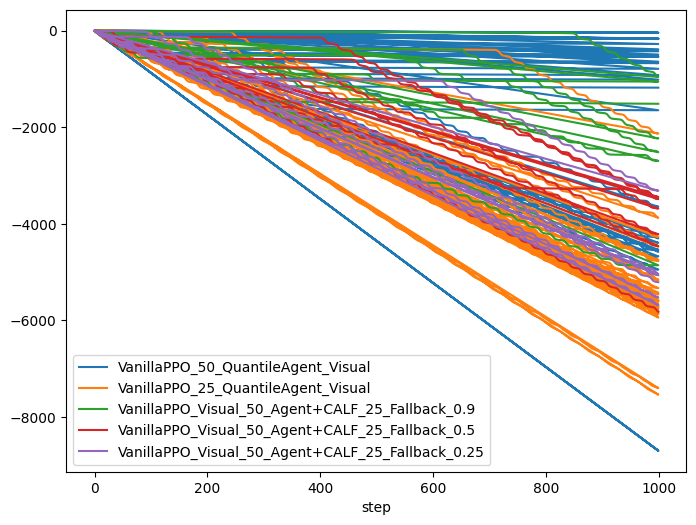

In [215]:
fig, ax = plt.subplots(figsize=(8, 6))
for c in alias.values():
    df[df.Case == c].plot(x="step", y="accumulated_reward", ax=ax, label=c)

In [216]:
import matplotlib.colors as mcolors

color_list = list(mcolors.TABLEAU_COLORS.keys())
case_colors = {c:color_list[i] for i, c in enumerate(alias.values())}
case_colors

{'VanillaPPO_50_QuantileAgent_Visual': 'tab:blue',
 'VanillaPPO_25_QuantileAgent_Visual': 'tab:orange',
 'VanillaPPO_Visual_50_Agent+CALF_25_Fallback_0.9': 'tab:green',
 'VanillaPPO_Visual_50_Agent+CALF_25_Fallback_0.5': 'tab:red',
 'VanillaPPO_Visual_50_Agent+CALF_25_Fallback_0.25': 'tab:purple'}

In [217]:
n_runs = df.loc[:, ["Case", "file_name"]].groupby(["Case"]).nunique().values[0]
df.loc[:, ["Case", "file_name"]].groupby(["Case"]).nunique(), int(n_runs[0])

(                                                  file_name
 Case                                                       
 VanillaPPO_25_QuantileAgent_Visual                       30
 VanillaPPO_50_QuantileAgent_Visual                       30
 VanillaPPO_Visual_50_Agent+CALF_25_Fallback_0.25          6
 VanillaPPO_Visual_50_Agent+CALF_25_Fallback_0.5           6
 VanillaPPO_Visual_50_Agent+CALF_25_Fallback_0.9           7,
 30)

In [218]:
# df.loc[:, ["Case", "file_name"]].groupby(["Case"]).nunique()
group_df = df.loc[:, ["Case", "file_name", "accumulated_reward"]].groupby(["Case", "file_name"]).last()
group_df = group_df.reset_index().drop(columns=["file_name"])
group_df.columns = ["last_accumulated_reward" if column == "accumulated_reward" else column for column in group_df.columns]
group_df.groupby("Case").agg({
    "last_accumulated_reward": ["std", "var", "min", "mean", "median", "max"]
})

last_accumulated_reward  \
                                                                     std   
Case                                                                       
VanillaPPO_25_QuantileAgent_Visual                            958.585614   
VanillaPPO_50_QuantileAgent_Visual                           2592.753122   
VanillaPPO_Visual_50_Agent+CALF_25_Fallback_0.25              852.075561   
VanillaPPO_Visual_50_Agent+CALF_25_Fallback_0.5               899.752253   
VanillaPPO_Visual_50_Agent+CALF_25_Fallback_0.9              1335.691965   

                                                                           \
                                                           var        min   
Case                                                                        
VanillaPPO_25_QuantileAgent_Visual                9.188864e+05 -7536.8480   
VanillaPPO_50_QuantileAgent_Visual                6.722369e+06 -8697.0770   
VanillaPPO_Visual_50_Agent+CALF_25_Fallback_0.25  7.260328e+05 -5682.4980   
VanillaPPO_Visual_50_Agent+CALF_25_Fallback_0.5   8.095541e+05 -5821.4230   
VanillaPPO_Visual_50_Agent+CALF_25_Fallback_0.9   1.784073e+06 -4856.4805   

                                                                           \
                                                         mean      median   
Case                                                                        
VanillaPPO_25_QuantileAgent_Visual               -5430.465610 -5598.04465   
VanillaPPO_50_QuantileAgent_Visual               -2308.498415  -855.03918   
VanillaPPO_Visual_50_Agent+CALF_25_Fallback_0.25 -4971.972267 -5136.73320   
VanillaPPO_Visual_50_Agent+CALF_25_Fallback_0.5  -4184.069150 -3948.48960   
VanillaPPO_Visual_50_Agent+CALF_25_Fallback_0.9  -2260.532071 -2229.86870   

                                                             
                                                        max  
Case                                                         
VanillaPPO_25_QuantileAgent_Visual               -2128.1628  
VanillaPPO_50_QuantileAgent_Visual                 -41.5193  
VanillaPPO_Visual_50_Agent+CALF_25_Fallback_0.25 -3313.0503  
VanillaPPO_Visual_50_Agent+CALF_25_Fallback_0.5  -3442.6099  
VanillaPPO_Visual_50_Agent+CALF_25_Fallback_0.9   -958.3524

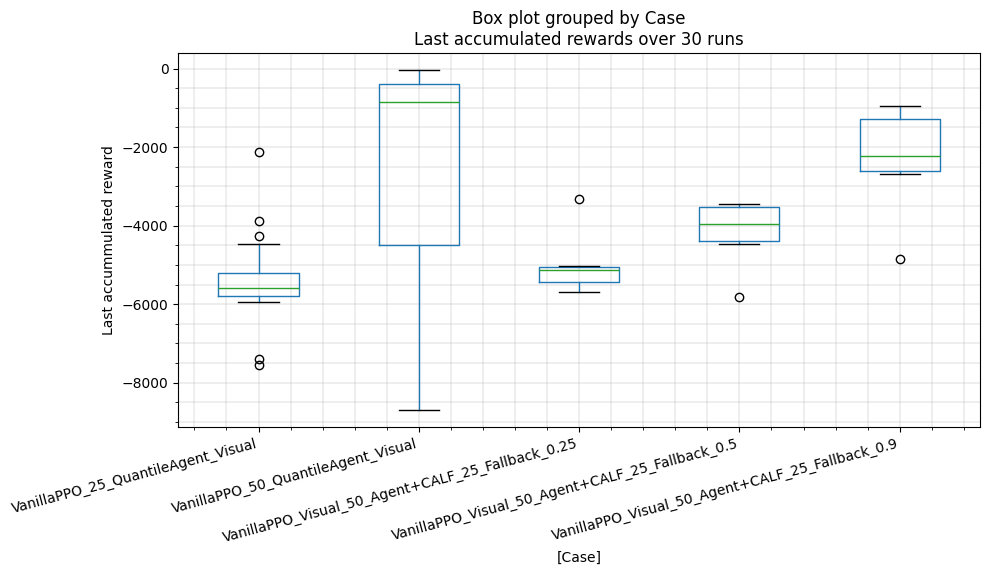

In [219]:
fig, ax = plt.subplots(figsize=(10, 6))
p = group_df.boxplot(by="Case",ax=ax)
p.set_xticklabels([l for l in p.get_xticklabels()], rotation=15, ha="right")
p.minorticks_on()

ax.set_ylabel("Last accummulated reward")
ax.set_title(f"Box plot grouped by Case\nLast accumulated rewards over {int(n_runs[0])} runs")
ax.grid(visible=True, which="both", linewidth=0.3)
fig.suptitle("")
plt.tight_layout()

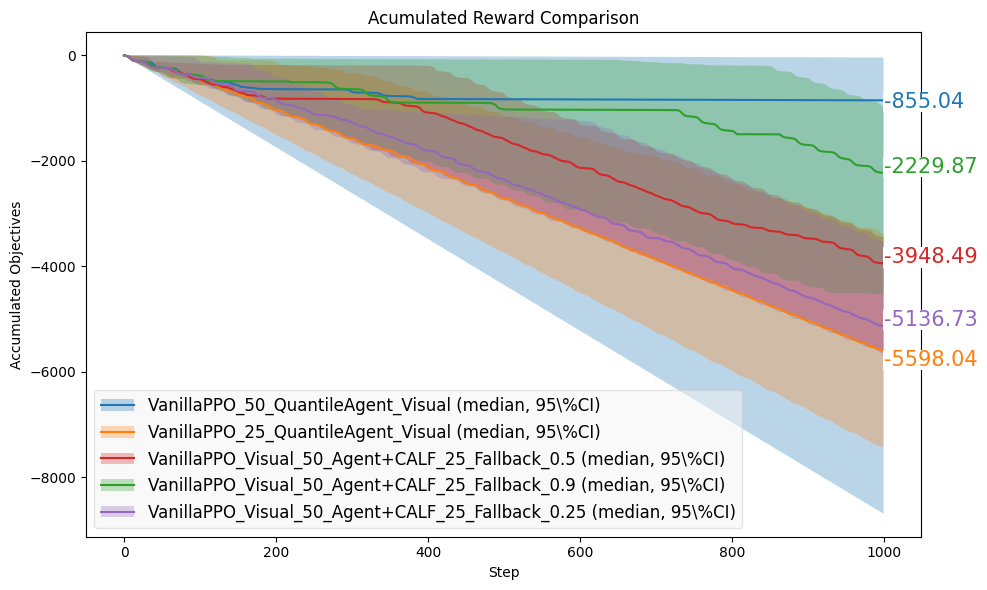

In [220]:
from scipy.interpolate import interp1d

def plot_ic(df, ax, 
            y_label="accumulated_reward",
            low_quantile=0.025, 
            high_quantile=0.975, 
            color=None, 
            use_interpolate=False,
            is_truncate=True):
    def quantile_low(series):
        return series.quantile(low_quantile)

    def quantile_high(series):
        return series.quantile(high_quantile)

    tmp_df = df.copy()
    ic_95_df = tmp_df.groupby("step").agg({y_label: [quantile_low, quantile_high]})

    # Plot
    if not use_interpolate:
        X_ = ic_95_df.index
        Y_hi = ic_95_df[y_label].quantile_high
        Y_lo = ic_95_df[y_label].quantile_low
    else:
        cubic_interpolation_model_hi = interp1d(ic_95_df.index, 
                                                ic_95_df[y_label].quantile_high, kind = "cubic")
        
        cubic_interpolation_model_lo = interp1d(ic_95_df.index, 
                                                ic_95_df[y_label].quantile_low, kind = "cubic")
    
        # Plotting the Graph
        X_=np.linspace(ic_95_df.index.min(), ic_95_df.index.max(), 40)
        Y_hi=cubic_interpolation_model_hi(X_)
        Y_lo=cubic_interpolation_model_lo(X_)
    
    p = ax.fill_between(X_, 
                        Y_hi, Y_lo, 
                        facecolor=color,
                        alpha=0.3)
    
    ax.set_xlabel("Step")
    ax.set_ylabel("Accumulated Objectives")

    return p

def plot_solid(df, ax, 
            y_label="accumulated_reward",
            low_quantile=0.025, 
            high_quantile=0.975, 
            color=None, 
            use_interpolate=False,
            is_truncate=True,
            bias=[0,0],
            agg_func="mean"):
    tmp_df = df.copy()
    target_df = tmp_df.loc[:, ["step", y_label]].groupby("step").agg(agg_func)

    # Plot
    if not use_interpolate:
        X_ = target_df.index
        Y_ = target_df[y_label]
    else:
        cubic_interpolation_model_mean = interp1d(target_df.index, 
                                                  target_df[y_label], kind = "cubic")
    
        # Plotting the Graph
        X_=np.linspace(target_df.index.min(), target_df.index.max(), 40)
        Y_=cubic_interpolation_model_mean(X_)
    
    p = ax.plot(X_, 
                Y_,
                color=color,
                alpha=1)

    ax.annotate(str(Y_.values[-1].round(2)), 
        (
            X_.values[-1] + bias[0], # X
            Y_.values[-1] + bias[1], # Y
            ),
            color=color,
            bbox=dict(facecolor='white', edgecolor="None", pad=0.2),
            fontsize=15)
    
    ax.set_xlabel("Step")
    ax.set_ylabel("Accumulated Objectives")
    
    return p[0]

tmp_df = df.set_index(["Case"])
y_label = "accumulated_reward"

fig, ax = plt.subplots(figsize=(10, 6))

legend_info = {}

anotation_bias = {
    "VanillaPPO_50_QuantileAgent_Visual": [0, -150],
    "VanillaPPO_25_QuantileAgent_Visual": [0, -300],
    "VanillaPPO_Visual_50_Agent+CALFWrapper_25_Fallback": [0, 300],
    "VanillaPPO_Visual_25_Agent+CALFWrapper_25_Fallback": [0, 0],
    "VanillaPPO_Visual_50_Agent+CALFWrapper_50_Fallback": [0, 0],
}

agg_func = "median"

for c in tmp_df.index.unique():
# for c in [
#     "VanillaPPO_50_QuantileAgent_Visual",
#     "VanillaPPO_25_QuantileAgent_Visual",
#     "VanillaPPO_Visual_50_Agent+CALFWrapper_25_Fallback",
#     # "VanillaPPO_Visual_25_Agent+CALFWrapper_25_Fallback",
#     # "VanillaPPO_Visual_50_Agent+CALFWrapper_50_Fallback",
# ]:
    p_m = plot_solid(tmp_df.loc[c], y_label=y_label, 
                     ax=ax, 
                     color=case_colors[c], 
                     bias=anotation_bias.get(c, [0, 0]),
                     agg_func=agg_func)
    p_ic = plot_ic(tmp_df.loc[c], y_label=y_label, ax=ax, color=case_colors[c])

    legend_info[c + f" ({agg_func}, 95\%CI)"] = (p_m, p_ic)

legend = ax.legend(legend_info.values(),
                   legend_info.keys(),
                   facecolor='whitesmoke', 
                   framealpha=0.5,
                   prop={'size': 12})

ax.set_title("Acumulated Reward Comparison")
plt.tight_layout()

In [221]:
anotation_bias = {
    "VanillaPPO_BestAgent_Visual": [0, 300],
    "VanillaPPO_BestAgent_Visual+CALFWrapper_BestFallback": [0, 0],
}

agg_func = "median"

# for c in tmp_df.index.unique():
for c in [
    # "VanillaPPO_BestAgent_Visual",
    # "VanillaPPO_BestAgent_Visual+CALFWrapper_BestFallback",
]:
    p_m = plot_solid(tmp_df.loc[c], y_label=y_label, 
                     ax=ax, 
                     color=case_colors[c], 
                     bias=anotation_bias[c],
                     agg_func=agg_func)
    p_ic = plot_ic(tmp_df.loc[c], y_label=y_label, ax=ax, color=case_colors[c])

    legend_info[c + f" ({agg_func}, 95\%CI)"] = (p_m, p_ic)

legend = ax.legend(legend_info.values(),
                   legend_info.keys(),
                   facecolor='whitesmoke', 
                   framealpha=0.5,
                   prop={'size': 12})

ax.set_title("Acumulated Reward Comparison")
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [222]:
legend_info

{'VanillaPPO_50_QuantileAgent_Visual (median, 95\\%CI)': (<matplotlib.lines.Line2D at 0x72bebce7f150>,
  <matplotlib.collections.PolyCollection at 0x72bebd8ad950>),
 'VanillaPPO_25_QuantileAgent_Visual (median, 95\\%CI)': (<matplotlib.lines.Line2D at 0x72bec20d59d0>,
  <matplotlib.collections.PolyCollection at 0x72bebe14b5d0>),
 'VanillaPPO_Visual_50_Agent+CALF_25_Fallback_0.5 (median, 95\\%CI)': (<matplotlib.lines.Line2D at 0x72bec3401e50>,
  <matplotlib.collections.PolyCollection at 0x72bebe14b410>),
 'VanillaPPO_Visual_50_Agent+CALF_25_Fallback_0.9 (median, 95\\%CI)': (<matplotlib.lines.Line2D at 0x72bebe1497d0>,
  <matplotlib.collections.PolyCollection at 0x72bebde2f490>),
 'VanillaPPO_Visual_50_Agent+CALF_25_Fallback_0.25 (median, 95\\%CI)': (<matplotlib.lines.Line2D at 0x72bebe1489d0>,
  <matplotlib.collections.PolyCollection at 0x72bebe394950>)}

KeyError: 'VanillaPPO_Visual_50_Agent+CALFWrapper_25_Fallback'

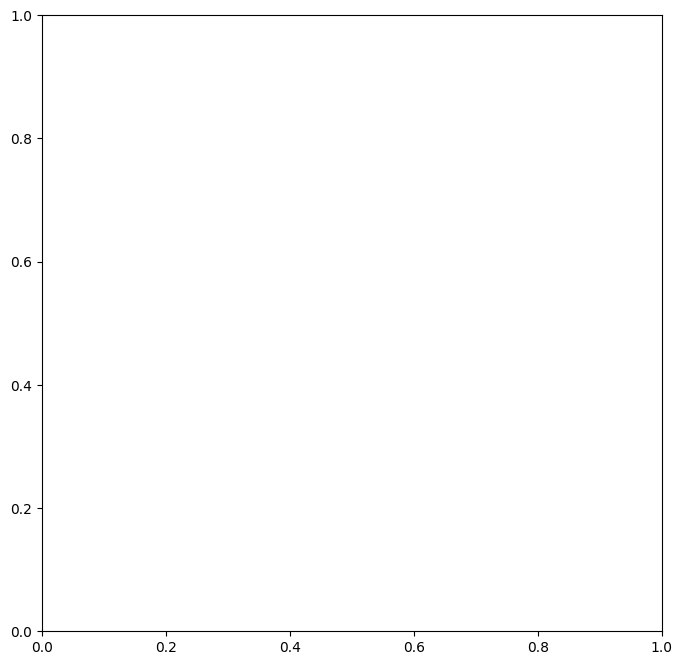

In [223]:
def plot_relax_prob(df, ax=None, c = "VanillaPPO_Visual_50_Agent+CALFWrapper_25_Fallback"):
    y_label = "relax_probability"

    if ax is None:
        fig, _ax = plt.subplots(figsize=(8, 8))
    else:
        _ax = ax
    tmp_df = df.set_index(["Case"])
    target_df = tmp_df.loc[c]

    for individual_run in tmp_df.loc[c].file_name.unique():
        target_df = tmp_df.loc[c]
        target_df = target_df[target_df.file_name == individual_run]
        
        target_df.plot(x="step", y=y_label, ax=_ax)

        current_color = _ax.get_lines()[-1].get_color() 
        _ax.annotate(str(target_df[y_label].values[0].round(2)), 
                            (
                                target_df.step.values[0], # X
                                target_df[y_label].values[0], # Y
                            ),
                            color=current_color,
                            bbox=dict(facecolor='white', edgecolor="None", pad=0.2))
        
        _ax.annotate(str(target_df[y_label].values[-1].round(2)), 
                        (
                            target_df.step.values[-1], # X
                            target_df[y_label].values[-1], # Y
                        ),
                        color=current_color,
                        bbox=dict(facecolor='white', edgecolor="None", pad=0.2))

    _ax.set_xlabel("Step", fontsize=15)
    _ax.set_ylabel("Relax Probability", fontsize=15)
    _ax.get_legend().remove() 
    _ax.set_title("Relax Probability\n" 
                #  "relax_prob = clip(relax_prob * relax_prob_step_factor,\n 0, 1)\n" + 
                #  "initial_relax_prob = 0.5\nrelax_prob_step_factor = 0.95\n" +
                #  "desired_calf_decay_rate = 0.01"
                 )
    plt.tight_layout()

    if ax is None:
        fig.savefig("../media/" + "relax_probability.png")
# relax_prob = np.clip(relax_prob * relax_prob_step_factor, 0, 1)
plot_relax_prob(df)

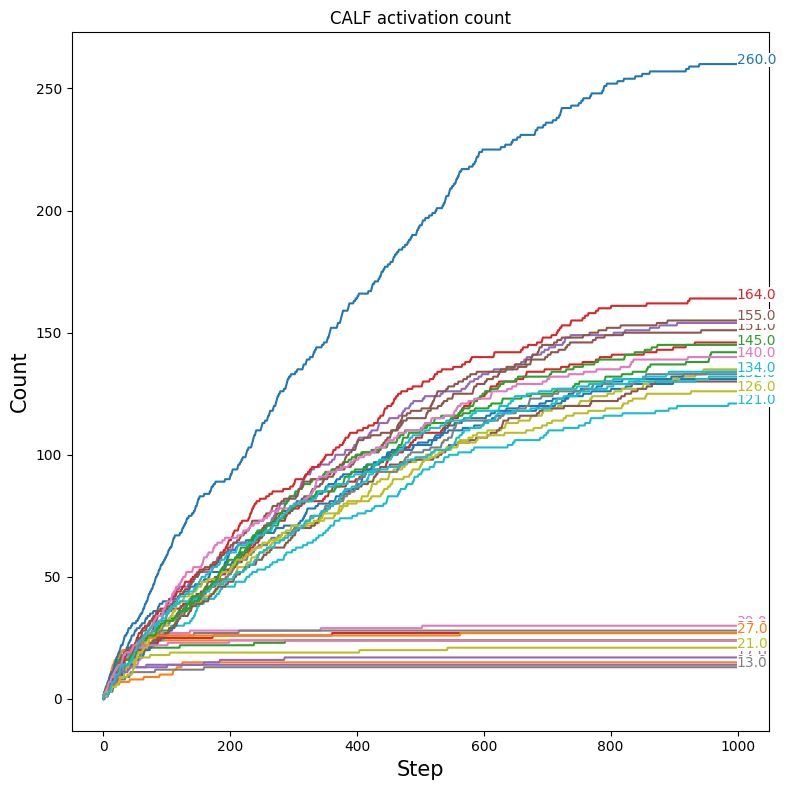

In [197]:
def plot_activated_count(df, ax=None, c="VanillaPPO_Visual_50_Agent+CALFWrapper_25_Fallback"):
    y_label = "calf_activated_count"

    if ax is None:
        fig, _ax = plt.subplots(figsize=(8, 8))
    else:
        _ax = ax
    tmp_df = df.set_index(["Case"])

    for individual_run in tmp_df.loc[c].file_name.unique():
        target_df = tmp_df.loc[c]
        target_df = target_df[target_df.file_name == individual_run]

        target_df.plot(x="step", y=y_label, ax=_ax)

        current_color = _ax.get_lines()[-1].get_color() 
        
        _ax.annotate(str(target_df[y_label].values[-1].round(2)), 
                        (
                            target_df.step.values[-1], # X
                            target_df[y_label].values[-1].copy(), # Y
                        ),
                        color=current_color,
                        bbox=dict(facecolor='white', edgecolor="None", pad=0.2))

    _ax.set_xlabel("Step", fontsize=15)
    _ax.set_ylabel("Count", fontsize=15)
    _ax.get_legend().remove() 
    _ax.set_title("CALF activation count")

    plt.tight_layout()
    
    if ax is None:
        fig.savefig("../media/" + "relax_probability.png")
# relax_prob = np.clip(relax_prob * relax_prob_step_factor, 0, 1)
plot_activated_count(df)



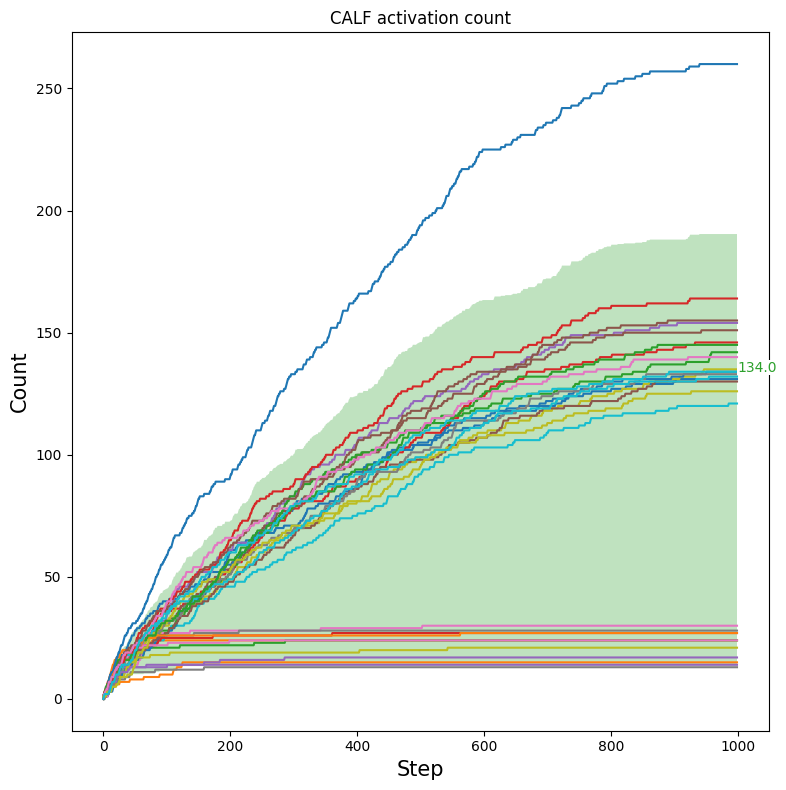

In [198]:
def plot_activated_count_ic(df, ax=None, c="VanillaPPO_Visual_50_Agent+CALFWrapper_25_Fallback"):
    y_label = "calf_activated_count"

    if ax is None:
        fig, _ax = plt.subplots(figsize=(8, 8))
    else:
        _ax = ax
    tmp_df = df.set_index(["Case"])

    p_ic = plot_ic(tmp_df.loc[c], y_label=y_label, ax=_ax, color=case_colors[c])

    # target_df.plot(x="step", y=y_label, ax=_ax)
    # current_color = _ax.get_lines()[-1].get_color() 

    for individual_run in tmp_df.loc[c].file_name.unique():
        target_df = tmp_df.loc[c]
        target_df = target_df[target_df.file_name == individual_run]

        target_df.plot(x="step", y=y_label, ax=_ax)
        
    current_color = case_colors[c]
    
    _ax.annotate(str(target_df[y_label].values[-1].round(2)), 
                    (
                        target_df.step.values[-1], # X
                        target_df[y_label].values[-1].copy(), # Y
                    ),
                    color=current_color,
                    bbox=dict(facecolor='white', edgecolor="None", pad=0.2))

    _ax.set_xlabel("Step", fontsize=15)
    _ax.set_ylabel("Count", fontsize=15)
    _ax.set_title("CALF activation count")

    _ax.get_legend().remove() 

    plt.tight_layout()
    
    # if ax is None:
    #     fig.savefig("../media/" + "relax_probability.png")

plot_activated_count_ic(df)

KeyError: 'VanillaPPO_undertrained+CALFWrapper'

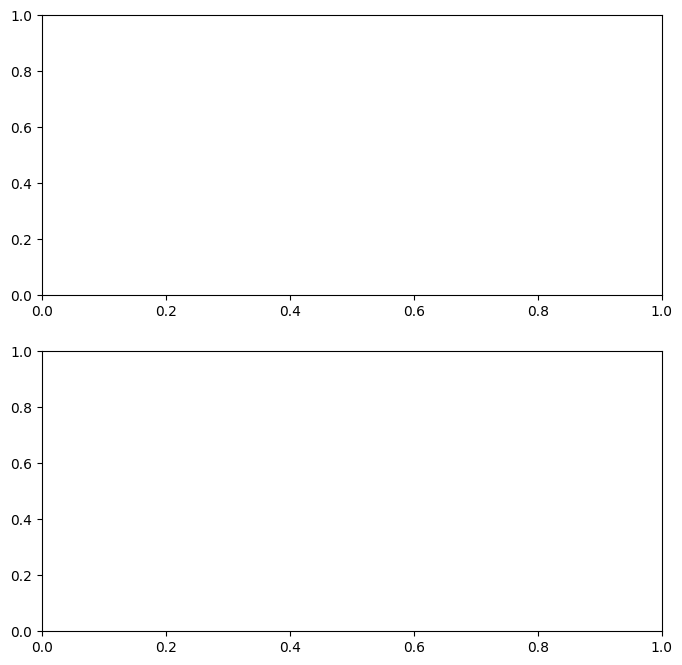

In [199]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
c = "VanillaPPO_welltrained+CALFWrapper"
c = "VanillaPPO_undertrained+CALFWrapper"
plot_relax_prob(df, ax[0], c=c)
plot_activated_count(df, ax[1], c=c)

In [68]:
df.x.describe()

count    150000.000000
mean          0.802011
std           0.485975
min          -1.000000
25%           0.974858
50%           0.997309
75%           0.999534
max           1.000000
Name: x, dtype: float64

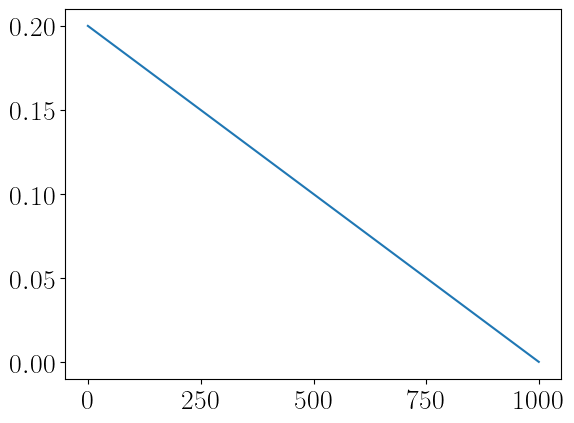

In [69]:
x = np.arange(1000)
initial_relax_prob = 0.2
y = - initial_relax_prob * 1e-3 * x + initial_relax_prob

plt.plot(x, y)